# Machine Learning and Statistics Project 2020
Author Angela Carpenter
- [power production dataset](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv) from Ian McLoughlin Github

# Table of Contents
- Project Instructions / Overview
- Project plan
- About this Notebook
- Python Libraries
- Downloading and running the code
- Loading / Reading in the dataset
- Exploring the dataset
- Describing the dataset
- Summary Statistics
- Visualising the dataset using plots
- Summary and Conclusions
- References


## Project Instructions

In this project you must create a web service that uses machine learning to make pre- dictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items.
1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.

## Project Plan
I will add to this as I go from step to step.

- Explore the dataset first using descriptive statistics and some plots. I think the plots should come first.
- Look at the distribution of the data
- Check for missing value and outliers
- Looking at any visual relationship between wind speed and turbine power output.
- Look up some background information on wind turbines
- Clean dataset if necessary and redo statistics
- some machine learning!


In [1]:
# first importing the following libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

import csv

In [2]:
# save link to data and reference the link 
csv_url = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'
# read the csv data into a pandas dataframe
df = pd.read_csv(csv_url)
df
# write the dataframe to csv
df.to_csv('df.csv')

In [3]:
print("The first few rows in the dataset: \n\n", df.head(3))  # look at the top 5 rows of the DataFrame df
print('\n The final few rows in the dataset \n',df.tail(3)) # Look at the bottom 5 rows of the DataFrame

The first few rows in the dataset: 

    speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0

 The final few rows in the dataset 
       speed  power
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


In [4]:
print("The index of the DataFrame: ", df.index) # the index or row labels of the DataFrame
print("The dtypes in the dataframe are:", end='\n\n')

print(df.dtypes) # the data types attributes for each column in df

The index of the DataFrame:  RangeIndex(start=0, stop=500, step=1)
The dtypes in the dataframe are:

speed    float64
power    float64
dtype: object


### Null values
Here I check for null values. The `isnull` function returns no null values, yet there does appear to be null values when you look at the head and tail of the dataset so I need to investigate this further. 
I think my problem is that zero values are not Null values in Python. Null values are not zero in Python.(https://realpython.com/courses/python-none/)

https://stackoverflow.com/questions/50767452/check-if-dataframe-has-a-zero-element

In [5]:
print(df.isnull().sum())
df.notnull().sum()

speed    0
power    0
dtype: int64


speed    500
power    500
dtype: int64

In [6]:
df.isnull().values.any()

False

### Zero values
There are no null values in the dataset but there are some zero values. While there is only one zero value for the `speed` variable, there is a whopping 49 zero values for the `power` variable!
I looked at some plots below but will bring them up here.
Look at the distribution of values to see if the zero values are very unusual compared to the remaining 451 values for the power variable. I don't know much yet about wind turbines but I would have thought that there should be more smaller values for wind speed than power. For instance on a very dry still day, maybe there would be very little or even no speed at all in the wind? However the dataset has only 1 zero value for speed.

From the project description, the power variable represents wind turbine power output and the speed values are wind speed values.


In [7]:
#The proportion of zero values 
40/500

0.08

### Visualise the data
I will visualise the data here before looking at the summary statistics below.
The histogram of wind speed looks quite uniform when the default number of bins are used, spread across speeds from almost zero to 25. (I need to see what exactly is being measured here, how wind speed is represented).
The wind turbine power values seem to have a peak at very low values. This is not surprising given the large number of zero power values in this dataset. Almost 10% of the power values supplied are zero.  There is another peak around values of 95-100. Most of the remaining power values fall between 18 and 85.
A scatter plot can show if there is any visible relationship between the two variables. For 


### Visualise the relationship between wind speed and wind turbine power:
The scatter plot below a linear relationship between wind speed values and power for mid-range speed values only.
- When wind speed increases from very low levels, the power does not increase by much or at all. 
- The wind turbine power values does start to increase with the wind speed from wind speed values of about 5 to about 18/19. 
- From wind speeds of 20 onwards to about 25 the power values increase no further and seem to level off. 

Before I go and look up some info on wind turbines, I can make some guesses here.
- Perhaps at very low levels of wind speed, there is simply not enough speed to get any level of movement going and at a particular speed level the power maxes out, that there is simply no way for the turbine to generate more power no matter how fast the wind becomes after a certain level. 
- Maybe once the turbine is started up from zero it will take some time before any measurable units of power can be generated, and once a sufficient level of wind speed is reached, it takes little change in speed to keep the turbine going and small reductions in speed would have little impact on the turbine once it is in motion.
- Maybe some of the power being generated is actually being consumed by the turbine. Maybe after a while once the turbine gets going, it requires little energy to continue.

The goal of this project is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. I am wondering if the data values in this dataset represent measurements over a particular period(s) of time, that some datapoints represent represent earlier or later measurements over a certain timeframe. There is no downward trend in the scatter plot representing values of power output falling. Perhaps the turbines simply get switched off and power values drop immediately to zero.  Lower values of power could represent the time taken for the wind turbine to start up and get going. The linear trend in the middle range representing the increasing power as wind speeds increase and the peak and plateau representing the maximum values that the turbines are capable of generating. My next step is to do a little research into wind turbines.

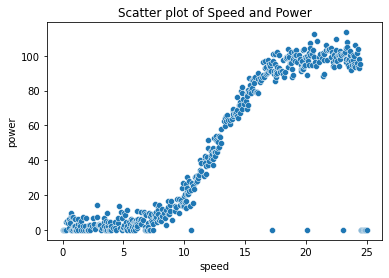

In [8]:
# create the plot
sns.scatterplot(x=df['speed'],y=df['power'])
# add title
plt.title("Scatter plot of Speed and Power");

In [9]:
# https://stackoverflow.com/questions/50767452/check-if-dataframe-has-a-zero-element
0 in df.values
df.isin([0]).any().any()

True

In [10]:
#https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe

df.isin([0]).sum()

speed     1
power    49
dtype: int64

In [11]:
df.sort_values(by='speed').head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [12]:
df.sort_values(by='speed', ascending=False).head()

,speed,power
499,25.000,0.0
498,24.950,0.0
497,24.875,0.0
496,24.850,0.0
495,24.775,0.0


In [13]:
df.sort_values(by='power', ascending=False).head()

,speed,power
461,23.273,113.556
416,20.646,112.362
447,22.497,109.932
420,20.871,108.485
464,23.348,108.167


In [14]:
df.sort_values(by='power').head()

,speed,power
0,0.000,0.0
111,5.806,0.0
110,5.781,0.0
105,5.556,0.0
89,4.880,0.0


In [15]:
df.sort_values(by='speed').head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


The [DataFrame.to_numpy()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy)function gives a NumPy representation of the underlying data. It converts the dataframe to a numpy array which may be useful here given that the data is all numerical types (floats64).

In [16]:
#df.to_numpy()

## Exploring the dataset using statistics

There are no categorical variables in this dataset.

### Quantitative variables
When looking at quantitative variables the characteristics of interest are the centre, spread, modality (the number of peaks in the pdf), the shape of the distribution and the outliers.
Pandas `describe` function generates statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. (excluding NaN values)

In [17]:
# get summary statistics of the numerical values, 
df.describe() # get statistics summary of the

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Much of this next part is some of the information on statistics that I had in my Tips dataset project. I will remove most of it but keep it here for now as a reference point.

#### Central Tendency statistics of the dataset

The **central tendency** or location of the data distribution is determined by the typical or middle values. The arithmetic mean is the sum of all the data values divided by the number of values. While the mean value is the average value in the dataset it may not be typical of the values in the dataset if there are very small or very large values in the dataset. The *median* is another measure of central tendancy - it is the middle value after all the values are put in an ordered list.
The mean and median are similar for symmetric distributions whereas for unimodal skewed distributions the mean will be more in the direction of the long tail of the distribution. 
The median can be considered a more typical value in the dataset or closer to some of the typical values and is also considered [robust](https://en.wikipedia.org/wiki/Robust_statistics) which means that removing some of the data will not tend to change the value of the median. A few extreme values will not affect the median as they would affect the mean. 
In this dataset the mean and median wind speed values are similar at approx 12.5 to 12.6.
The median power value is just over 41 compared to the mean power value of 48.
As we saw above, there are many zero values for power in the dataset. At least 10% of the power values are zero and probably for valid reasons.



In [18]:
print("The mean speed value is %.3f" %df['speed'].mean(),"while the median speed value  is %.3f" %df['speed'].quantile(q=0.5))
print("The mean power value is %.3f" %df['power'].mean(),"while the median power value  is %.3f" %df['power'].quantile(q=0.5))

The mean speed value is 12.590 while the median speed value  is 12.550
The mean power value is 48.015 while the median power value  is 41.645


#### Spread statistics
There are several statistics that are used to show the spread of the distribution of the data which concerns how far away from the centre the data points are located. The variance is the average of the squared deviations of each observation from the centre or mean of the data. Bigger deviations will make a bigger variance. The resulting variance figure will be in squared units of the original units. The *standard deviation* is the square root of the variance and is in the same units as the data and therefore can be more easily interpreted. 

In [19]:
#print(f"The variance and standard deviations of speed values  are {df['speed'].var():.3f} and {df['speed'].std():.3f}")
#print(f"The variance and standard deviations of power values are {df['power'].var():.3f} and {df['power'].std():.3f}")
print(f"The standard deviations of speed values  is {df['speed'].std():.3f}")
print(f"The standard deviations of power values is {df['power'].std():.3f}")
# df.var()

The standard deviations of speed values  is 7.225
The standard deviations of power values is 41.615


The *range* of values in the data is shown by the minimum and maximum values and is not considered a robust measure of spread but it is useful for showing possible errors or outliers. 

In [20]:
print(f"The minimum speed value is {df['speed'].min()} while the maximum speed value is { df['speed'].max()} giving range of {df['speed'].max() - df['speed'].min()}")

print(f"The minimum Power value is {df['power'].min()} while the maximum power value is { df['power'].max()} giving range of {df['power'].max() - df['power'].min()}")

The minimum speed value is 0.0 while the maximum speed value is 25.0 giving range of 25.0
The minimum Power value is 0.0 while the maximum power value is 113.556 giving range of 113.556


Another measure of spread is determined by the percentiles or quartiles of the values.  
The 25% percentiles is the first quartile and one quarter of the values fall below this. 
The 50% percentile is the median value where half of the data falls below it and half above it. 
-The 75% percentiles is the 3rd quartile where $\frac{3}{4}$ of the data points fall below it and one quarter above it. These figures are used to calculate the *Interquartile range (IQR)* which is calculated by taking the 75% percentile or 3rd quartile (Q3) minus the 25% percentile or first quartile (Q1). $$IQR = Q3 - Q1$$
Therefore half of the values are captured by the IQR which are the middle values of the data. Data that is more spread out will have a higher IQR. The IQR is considered a more robust measure of spread than the variance and standard deviation and will be more clearly shown in the boxplots further down. The IQR does not consider the data below the 25% percentile or above the 75% percentile which may contain outliers. The statistics here show that the **power** variable in this dataset is much more spread out or variable than the **speed** variable.  

In [21]:
print(f"The median speed value is {df['speed'].quantile(q=0.5)} with the IQR ranging from {df['speed'].quantile(q=0.25):.2f} to  {df['speed'].quantile(q=0.75):.2f}")
print(f"The median power value is {df['power'].quantile(q=0.5)} with the IQR ranging from {df['power'].quantile(q=0.25):.2f} to  {df['power'].quantile(q=0.75):.2f}")

The median speed value is 12.5505 with the IQR ranging from 6.32 to  18.78
The median power value is 41.6455 with the IQR ranging from 5.29 to  93.54


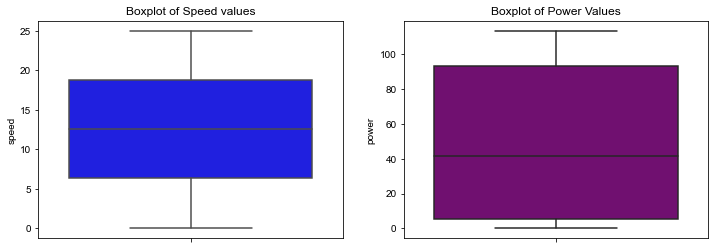

In [22]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set(style="ticks", palette="pastel")
sns.boxplot(y=df['speed'], ax=axes[0], color="blue")
# add a title
axes[0].set_title("Boxplot of Speed values")
sns.boxplot(y=df['power'], ax=axes[1], color="purple")
axes[1].set_title("Boxplot of Power Values");

The skewness of the data is a measure of assymetry which can be seen by the lopsidedness of a boxplot.
Wind speed appears to be quite symmetric. The wind speed boxplot is cut pretty much in half by the median. Power appears to be soemwhat skewed to the right as the boxplot shows more of the box to the right or above the median line.
A boxplot with the median closer to the lower quartile is considered positively skewed. Positively skewed data has the mean greater than the median and it can be interpreted as having a higher frequency of high valued scores. The lower values of power are closer together than the higher power values.


### Describing the dataset visualisations - maybe move some visualisations up before the statistics
This section will look at some graphical EDA of the univariate data in the dataset.
Some visualisations of the dataset that can be used to verify these summary statistics. 
Plots can highlight any obvious relationships between the different variables in the dataset. They can also be used to identify any groups of observations that are clearly separate to other groups of observations.

#### Histogram and Kernel Density estimate plots of Speed and Power values
Histograms can be used to show the distribution of a single quantitative variable such as the speed or power in this dataset. A histogram visualises the centre and spread of the distribution as well as showing if there is any skew in the data. 
Such a plot charts the data using adjacent rectangular bars and displays either the frequency or relative frequency of the measurements for a range of values in each interval. Each interval or range of values is a *bin*. The number of bins can be specified although seaborn and matplotlib will automatically choose this. The number of bins chosen usually depends on the amount of data and the shape of the distribution. Changing the number of bins can reveal some other features of the data.


(The mode is the most frequently occuring value in a distribution. There is no mode function in pandas or even numpy. It is not really used as such except for describing whether a distribution is unimodal, bimodal or multimodal which depends on how many peaks there is in the distribution. In multimodal distributions there is no unique highest mode.)

The histogram of wind speed looks to be uniformly distributed with wind speed values spread out from zero up to 25 which seems to be the max speed value. Power values on the other hand looks bimodla with two defined peaks, one around zero power values and the second around the 100 kilowatt mark. 

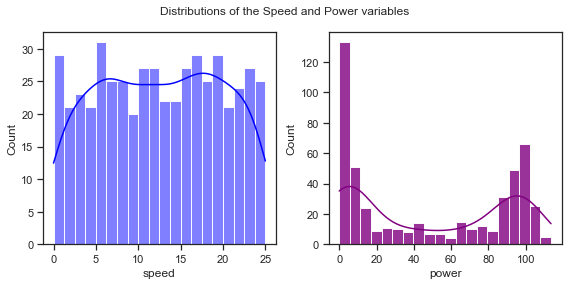

In [23]:
%matplotlib inline

# plot the histograms of Speed values
f, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=df, x="speed", ax=axs[0], bins=20, kde=True,color="blue")
sns.histplot(data=df, x="power", alpha=.8, legend=False, ax=axs[1], bins=20, kde=True, color="purple")
plt.suptitle("Distributions of the Speed and Power variables")
f.tight_layout()

## Investigating a relationship between Wind Speed and Wind Turbine Power output

Scatter plots are useful to identify trends and patterns in a dataset which might indicate a relationship between variables. The dataset here contains two numerical variables wind speed and turbine power values. 
The ordered pairs of numbers consisting of the independent variable 'wind speed' and the dependent variable 'power output' are plotted below resulting in a joint distribution of the two variables. Each point represents an actual observation is the dataset with a speed and a corresponding power value. 
The scatter plot shows an increasing linear trend in the middle range of the wind speed values. This would indicate that for increasing wind speeds in this range, power output values do increase, but only after a minimum wind speed has been reached. Power outputs then increase in line with increases in wind speed until it reaches a peak and plateaus.
The correlation statistics puts a numerical value on the strength and direction of the relationship. 

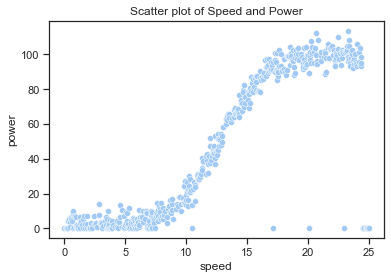

In [24]:
# create the plot
sns.scatterplot(x=df['speed'],y=df['power'])
# add title
plt.title("Scatter plot of Speed and Power");

### Correlation and Covariance of Speed and Power values
For two quantitative variables such as the wind speed and power values, the covariance and correlation can be used to determine whether a linear relationship between variables does exist and to show if one variable tends to occur with large or small values of another variable.

The [Covariance](https://en.wikipedia.org/wiki/Covariance) is a measure of the joint variability of two random variables and the (Pearson) [correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is the normalised version of the covariance which shows by its magnitude the strength of the linear relation.

The covariance can be used to see how much two variables such as wind speed and wind turbine power vary with each other and in what direction turbine power output will move when wind speed value moves. 
If the covariance here is positive it would mean that when the wind speed measurement is above it's mean then the wind turbine power measurement will more than likely be above it's mean also and vice versa. 
If the covarince here is negative, when wind speed measurements are above their mean value, then the wind turbine power output is likely to be below its mean value.
If there is a zero covariance (or a covariance value close to zero) this implies that the two variables wind speed and wind turbine output vary independently of each other. 

The correlation statistics are computed from pairs of arguments. If there is a strong positive relationship between the wind speed and wind turbine power output variables, we would expect to see a correlation coefficient close to 1. A strong negative relationship would have a correlation coefficient value close to -1. A value close to zero would indicate that there is no relationship between the variables. The correlation is easier to interpret than the covariance as it does not depend on the units of measurement or which variable is the independent variable and which is the dependent variable. 

Pandas can be used to easily calculate the covariance and correlation coefficient. The correlation coefficient here of 0.85 shows there is a very strong positive relationship between the wind speed and turbine power output.

(It should be noted that correlation however is not the same as causation.)


In [25]:
df.cov()
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


### Regression plots
The Python Seaborn library has some regression plots that can be used to quickly visualise relationships and patterns that may exist in the data. They use statistical models to estimate a simple relationship between sets of observations and are mainly used to visualise patterns in a dataset during the exploratory data analysis. There are other Python libraries such as **statsmodels** that are recommended for looking at more quantitative measures concerning the fit of the regression models which can be looked at later on!.

The scatter plot earlier showed a relationship between wind speeds and wind turbine power that is not quite linear. There does seem to be a somewhat linear relationship for wind speeds between values of about 10 up to about 18 or so. Therefore it is worth looking at higher order polynomials as well as linear regression.
The plot below shows that the polynomial with order 3 looks a much better fit to the line than the first or second order linear regression lines. 

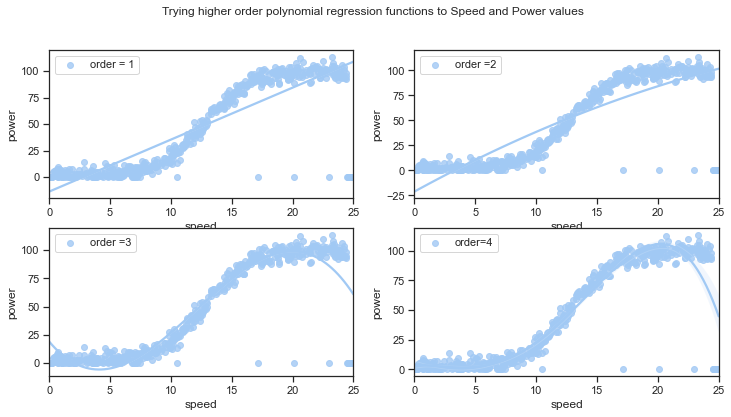

In [26]:
f, axes = plt.subplots(2, 2, figsize=(12, 6))
x = "speed"
y = "power"
sns.regplot(x="speed", y="power", data=df, ax=axes[0,0], label="order = 1", ci=False); axes[0,0].legend()
sns.regplot(x="speed", y="power", data=df, order=2, ax=axes[0,1], label="order =2", ci=False); axes[0,1].legend()
sns.regplot(x="speed", y="power", data=df, order=3, ax=axes[1,0], label="order =3", ci=False); axes[1,0].legend()
sns.regplot(x="speed", y="power", data=df, order=4, ax=axes[1,1], label = "order=4"); axes[1,1].legend()
plt.legend()
plt.suptitle("Trying higher order polynomial regression functions to Speed and Power values")
plt.show()

#### Using a lowess smoother to fit a regression of speed and power
Another way of fitting a nonparametric regression is to use
[lowess smoothing](https://www.statisticshowto.datasciencecentral.com/lowess-smoothing/) to fit a line to a scatter plot where noisy data values, sparse data points or weak interrelationships might interfere with your ability to see a line of best fit. (Lowess smoothing is also used for linear regression where least squares fitting doesn’t create a line of good fit or is too labor-intensive to use)

Lowess are non-parametric strategies for fitting a smooth curve to data points. A parametric fitting assumes the data fits some distribution which can misrepresent the data whereas non-parametric smoothers try to fund a curve of best fit without assuming the data must fit some distribution shape.


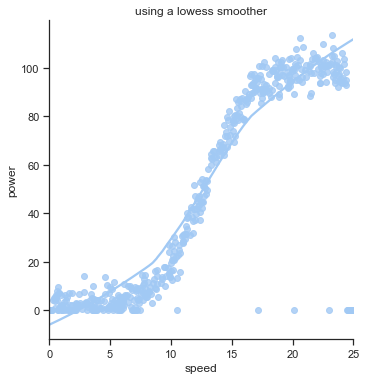

In [27]:
sns.lmplot(x="speed", y="power", data=df, lowess=True)
plt.title("using a lowess smoother")
plt.show()

Residual plots can be used to check whether the simple regression model of speed ~ power  is appropriate for a dataset.
A residplot fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0. If there is structure in the residuals, this suggests that simple linear regression is not appropriate for the data.

If the residual plot does have a shape this suggest non-linearity in the data set.

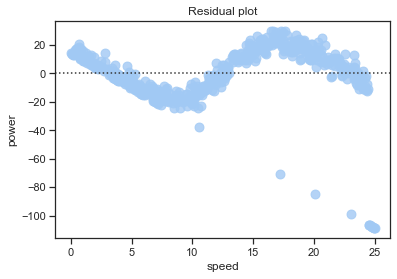

In [28]:
sns.residplot(x="speed", y="power", data=df, scatter_kws={"s": 80})
plt.title("Residual plot"); plt.show()

---
## Researching Wind Turbines
As there is little in the dataset apart from two columns of 500 floating numbers, I need to do a little research to find out what these values represent and how they are quantified. Power is probably in kilowatts and speed in something per hour!. There is a mention of 15 metres per second at the turbine in the video.
I am looking up some information about Irish wind farms. I'm presuming where exactly the data came from does not matter. 

[The Irish Wind Energy Association (IWEA)](https://www.iwea.com/about-us/about-us) is the representative body for the Irish wind industry, working to promote wind energy as an essential, economical and environmentally friendly part of the country’s low-carbon energy future. 
They note here that in 2018 wind energy provided 29 per cent of Ireland’s electricity.

Their [FAQs](https://www.iwea.com/about-wind/faqs) page tells us that each quarter, both EirGrid and ESBN publish updated wind farm statistics for Ireland at the following links:
[ESBN Connected Wind Farms](https://www.esbnetworks.ie/new-connections/generator-connections/generator-connection-statistics).
There is currently 4,130 MW of installed capacity in ROI and new Eirgrid link here http://www.eirgridgroup.com/how-the-grid-works/renewables/

Also on this website is a question about how much electricity a turbine generates. (See FAQ 16.)

>The amount of electricity a turbine can generate depends on the type of turbine and the wind conditions at any time. There are many different models of turbines that can generate different amounts of electricity. Ireland’s largest wind farm is the Galway Wind Park in Connemara. The turbines there are 3 MW turbines. To use them as an example, when the wind is blowing steadily they can each generate 3 MW of electricity. A megawatt (MW) is a unit of energy.A single megawatt is equivalent to around 1,000 kilowatts. Boiling a kettle, for example, takes around two kilowatts.

Another website of interest is Eirgrid's [Smart grid dashboard](http://smartgriddashboard.eirgrid.com/#all/about).
The [dashboard](http://smartgriddashboard.eirgrid.com/#all/wind)shows actual and forecast wind generation by day, week and month for allwind farms on the system.

The [sem-o.com](https://www.sem-o.com/links/) that we looked at in Data Representation might be worth a look also. It has a page of links. Not sure yet how much detail if any I need. The data.gov.ie might have some datasets.
Also the EU Open data portal has some datasets.
https://data.europa.eu/euodp/en/data/dataset/jrc-emhires-wind-generation-time-series
[Electricity from wind power; AC; production mix, at power plant; < 1kV (Location: RER)](https://data.europa.eu/euodp/en/data/dataset/jrc-eplca-fe1c3d03-072b-4da7-8fff-3505f9b01efc)

- [WindEurope](https://windeurope.org/data-and-analysis/) has facts and issues about wind energy in Europe, in particular the section on [Wind Energy Basics](https://windeurope.org/about-wind/wind-basics/)

Watching the video on this project again, the lecturer Ian notes how the idea for the project came about. 
Say a company produces power using wind turbines. In the electricity market, producers of electricity would sell their electricity ahead of time.  They enter into a contract that says they will produce so many kilowatts  electricity during at a certain time, maybe between 11am tomorrow and 11am the next day. The price is negotiated today and tomorrow you start generating electricity and pushing it onto the supply grid. 
It is easier for those burning coal or gas or doing nuclear fusion to burn the right amount to generate the right amount of electricity. With wind turbines however you don't know how much electricity you will generate tomorrow because your generation of electricity depends on wind power. As you don't know how much wind there is going to be tomorrow you make an estimate by getting some meterological data from Met Eireann or some other weather prediction agent and use the weather prediction to help you predict how much electricity you are likely to produce. The prediction may not always be correct but you aim to reduce how often your calculations are wrong.

A first step in that kind of workflow would be to say when the wind speed is X amount, for example at 15 metres per second at the turbine, how much power is produced from the wind turbines. The wind turbine supplier would have provided a rough estimate of how much power the turbine is capable of producing at 15 metres per second. Knowing all this is not really necessary for this project but to instead take the dataset with the two columns of numerical values and be able to predict one of the numbers from the other.




Based on above, it is likely that the wind speed is measuring in so many metres per second. The video mentions 15 as an example but I need to check this out. Power is most likely in kilowatts. I need to look up some more on this.
As noted above in the initial investigation of the dataset, there are quite a number of zero values for power in the dataset. I need to determine whether these values are valid and if so should they remain in the data when I go to the next step of training a model. As theorised earlier, perhaps some of the low or zero values are there when a wind turbine is powered on after being off and taking some time or effort to be productive. However I need to check as I don't know the physics or technical reasons behind this. While most of the zero power values are associated with low values of speed, there are some that are not and occur when the wind speed is actually at it's max in the dataset so therefore there must be another reason that the power output is zero at such levels, as if the wind turbine is actually power off completely and maybe this is the case. Maybe it switches off after a certain max wind speed for safety or other reasons. These values do look like outliers on the scatter plot.
The scatter plot seems to have three different trends apparent as shown earlier, the first section at low values of wind speed where the wind turbine values are clustered around zero (including the 10% of observations that have zero power values), the second section where there seems to be a linear trend between wind speed and power output and thirdly the last section where the values of power have reached a peak at higher wind speeds and plateau, and also the outliers here.


---
### How does wind energy work
Find out some more on how wind energy works. Look at the section on [Wind Energy Basics](https://windeurope.org/about-wind/wind-basics/) on WindEurope website.
Few facts here:
- energy is the ability to do work
- [What is Energy ?](https://windeurope.org/about-wind/wind-basics/). 
>Generally, energy can be categorised into either kinetic energy (the energy of moving objects) or potential energy (energy that is stored). The different types of energy include thermal energy, radiant energy, chemical energy, electrical energy, motion energy, sound energy, elastic energy and gravitational energy.
In the case of wind energy, wind turbines take the kinetic energy that’s in the wind and convert that kinetic energy into mechanical power. We mostly use this mechanical power in the form of electricity.

There is plenty more her on how wind is actually caused by 3 things: the heating of the atmosphere by the sun,  the rotation of the earth and the Earth's surface irregularities.
Wind energy captures the energy of the wind and converts it to electricity. It is an alternative to burninf fossil fuels.
A wind turbine is a device that converts kinetic energy from the wind into electricity. A group of wind turbines is a wind farm. There are both on-shore and off-shore types. Their output ranges from as small as 100 kilowatts to as big as 12 megawatts.
There are three main variables determining how much electricity a turbine can produce.
- Wind speed
- Blade radius
- Air density.

Our dataset only has wind speed and power values so perhaps we can assume these values are constant for the dataset, particularly I would think the blade radius. 
The article also outlines what happens when the wind doesn't blow. A wind farms location is usually chosen purposely. Therefore when a wind turbine is not turning it is usually because of maintenance, or because it must be stopped for safety reasons in case of strong winds or a storm. So safety reasons would account for the zero power values at the very high values of wind speed and maintenance could account for some of the other zero values Therefore I may need to see exactly what the pattern is here. Perhaps then some of the zero values should be ommited from some of the analysis and model training, or perhaps done alongside.

In [29]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [30]:
df.sort_values(by='speed', ascending=False).head()

,speed,power
499,25.000,0.0
498,24.950,0.0
497,24.875,0.0
496,24.850,0.0
495,24.775,0.0


# Machine Learning.

Here I am going to start looking at applying some machine learning algorithms to the dataset. The 3 algorithms I will start looking at are as follows:

- Classification: Identifying which category an object belongs to.

- Regression: Predicting a continuous-valued attribute associated with an object.

- Clustering: Automatic grouping of similar objects into sets.

The goal of the project is to predict wind power from wind speed. I think this problem falls into supervised learning.
Classification and Regression seem to be the most suitable for this problem. 
However I am going to have a look using clustering, even just to review what was covered in class.
I am first going to try some algorithms without any preprocessing of the data. 
Clustering groups data points into clusters of similar values. It might not be suitable for predicting the wind power from speed but it can help to understand the data by grouping the existing datapoints (wind speed and power vale pairs) into clusters.
Clustering divides the data into clusters based on patterns in the data. So at least it will be useful to see the patterns in this dataset.


***
## Clustering
Although I don't think that clustering is the right algorithm to use here but just to explore the data.

I am reimporting the dataset here. 

First I import the libraries, then do some plotting to visualise the dataset.

See [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict)


See [k-means clustering](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) article on AnalyticsVidhya.

In [31]:
# first importing the following libraries
# Numerical arrays.
import numpy as np
import pandas as pd  
# plotting
import matplotlib.pyplot as plt 
import seaborn as sns

import csv

In [32]:
# save link to data and reference the link 
csv_url = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'
# read the csv data into a pandas dataframe
df = pd.read_csv(csv_url)
df
# write the dataframe to csv
df.to_csv('df.csv')

In [33]:
# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Plotting.
import matplotlib.pyplot as plt

### Preparing the data for clustering.
Here I am creating an numpy array of the speed values and another array holding the corresponding y values.
The `fit` method takes in an matrix of training instances to cluster. (An array-like sparse matrix of shape (n_samples, n_features).
We only have two features in this dataset and there are 500 samples provided. 

Below I create a 2-d array containing the speed and corresponding power values. Numpy `vstack` is used to vertically stacks the two arrays on top of each other to get an outer array.


In [34]:
x1 = np.array(df.speed)
x2 = np.array(df.power)

In [35]:
X =  np.vstack([x1, x2]).T
X.size 
# 1000
X.shape
# (500, 2)

(500, 2)

In [36]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (14, 10)

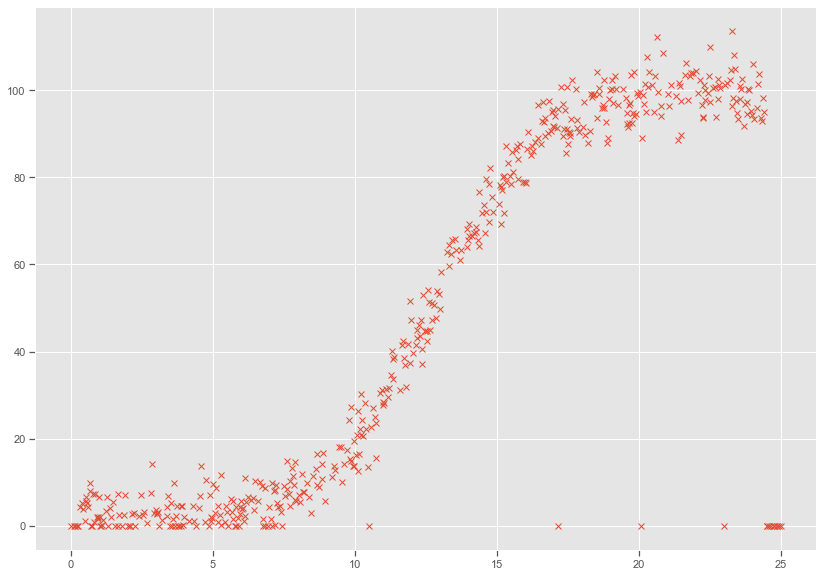

In [37]:
# Plot the data set.

# Plot the data set.
plt.plot(X[:,0], X[:,1], 'x')

### Performs kmeans fitting and plot the clusters found
The default number of clusters to scikit-learns KMeans is 8. I tried various other numbers from 2 to 8.
Below the points are coloured according to the clusters they have been assigned to by the algorithm. I didn't change any other parameters. I also used all the datapoints for training and there is no test set provided. I could generate some random values based on the original dataset which I will come back to when I look at this in more detail.
The cluster centres are plotted as black dots on the plot.
Choosing the correct number of clusters is achieved by running the kmeans algorithm with increasing cluster sizes and then plotting the results. 
Inertia refers to the sum of squared distances of samples to their closest cluster center.
Beginning with a small number of clusters, train the model, calculate the inertia and plot it. Increase the number of clusters, train the model again, calculate the new inertia value and plot it. Repeat this again. When you plot the resulting inertia values using the various number of clusters, you would expect to see that the inertia value fall sharply at some stage when you increase the number of clusters by one, then the fall in inertia will be not as sharp then reduce again. The decrease in inertia values usually becomes constant when you increase the number of clusters further. This indicates that you will gain nothing by increasing the number of clusters further.

In [38]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=5, random_state=0).fit(X)
kmeans = skcl.KMeans(n_clusters=6, random_state=0).fit(X)
# default is 8 clusters
kmeans = skcl.KMeans(random_state=0).fit(X)

In [39]:
kmeans.inertia_

9033.50298589591

In [40]:
kmeans.n_iter_

8

In [41]:
centres = kmeans.cluster_centers_
centres

array([[ 3.85583571e+00,  2.72733571e+00],
       [ 1.69746923e+01,  8.72047231e+01],
       [ 1.07004815e+01,  2.72306296e+01],
       [ 2.10317500e+01,  9.94023047e+01],
       [ 1.22622571e+01,  4.49212571e+01],
       [ 7.90798305e+00,  1.17846610e+01],
       [ 1.41694242e+01,  6.76029394e+01],
       [ 2.36699231e+01, -7.10542736e-15]])

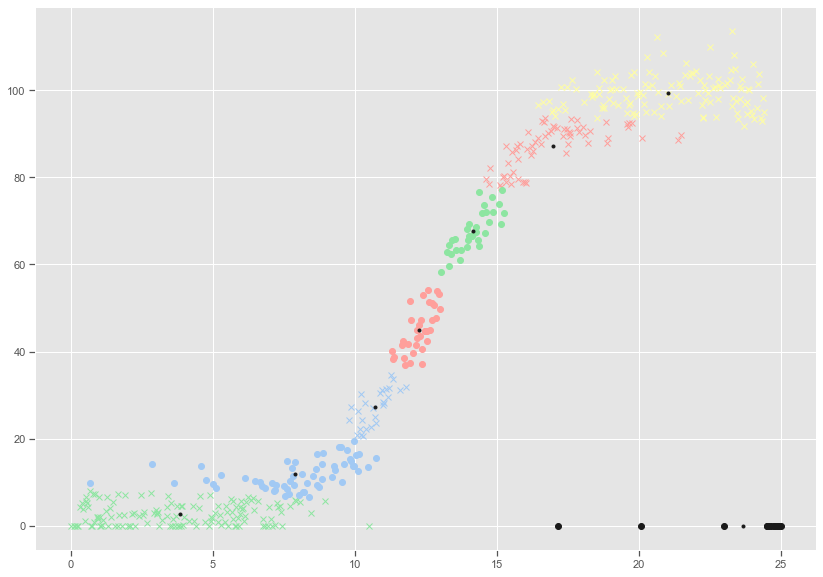

In [42]:
# Plot the data set.
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(X[kmeans.labels_ == 2][:,0], X[kmeans.labels_ == 2][:,1], 'bx')
plt.plot(X[kmeans.labels_ == 3][:,0], X[kmeans.labels_ == 3][:,1], 'yx')
plt.plot(X[kmeans.labels_ == 4][:,0], X[kmeans.labels_ == 4][:,1], 'ro')
plt.plot(X[kmeans.labels_ == 5][:,0], X[kmeans.labels_ == 5][:,1], 'bo')
plt.plot(X[kmeans.labels_ == 6][:,0], X[kmeans.labels_ == 6][:,1], 'go')
plt.plot(X[kmeans.labels_ == 7][:,0], X[kmeans.labels_ == 7][:,1], 'ko')
plt.plot(centres[:,0], centres[:,1],'k.')

In [43]:
kmeans.inertia_

9033.50298589591

See [k-means clustering](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) article on AnalyticsVidhya.

Text(0, 0.5, 'Inertia')

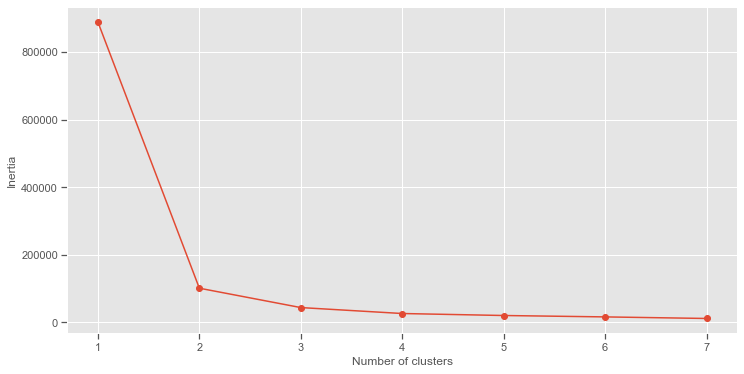

In [44]:
# fitting multiple k-means algorithms and storing the values in an empty list
Inertia = []
for cluster in range(1,8):
    kmeans = skcl.KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    Inertia.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,8), 'Inertia':Inertia})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

This suggests that the correct number of clusters is two. However clustering is not really suitable here.

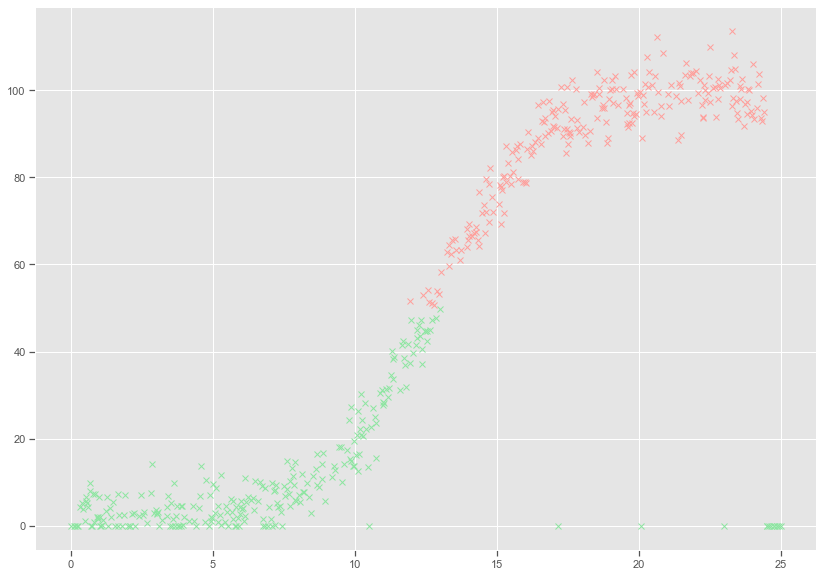

In [45]:
kmeans = skcl.KMeans(n_clusters=2, random_state=0).fit(X)
# plot the clusters
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'rx')

## Regression

The scatter plot earlier in the notebook using Seaborn plots showed a relationship between wind speeds and wind turbine power that is non-linear. Therefore it is worth looking at higher order polynomials. The plot of the polynomial with order 3 looked to be a better fit to the line than the first or second order linear regression lines. 
Therefore I will look at using the numpy polyfit function as demostrated in class on the data. 

In [46]:
# first importing the following libraries
# Numerical arrays.
import numpy as np
import pandas as pd  
# plotting
import matplotlib.pyplot as plt 
import seaborn as sns

import csv

In [47]:
# save link to data and reference the link 
csv_url = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'
# read the csv data into a pandas dataframe
df = pd.read_csv(csv_url)
df
# write the dataframe to csv
df.to_csv('df.csv')

In [48]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (14, 10)

In [49]:
# assign speed to x and power to y
x = df.speed
y = df.power

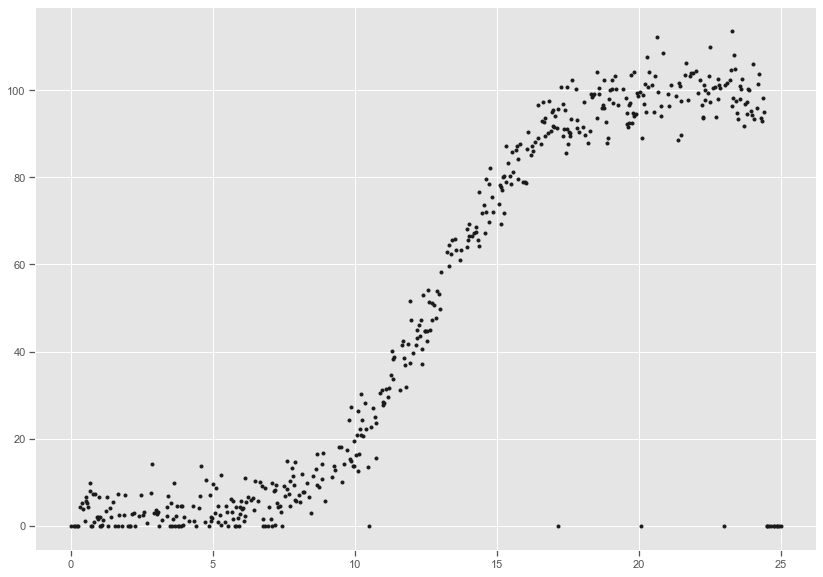

In [50]:
# Plot x versus y.
plt.plot(x, y, 'k.')

In [51]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([  4.91759567, -13.89990263])

In [52]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(4.917595665404671, -13.89990263051961)

As the plot below shows, there are sections of the fitted line where all the values either fall below the line or above the line. If a linear model was suitable you would expect to see the line going through the centre of the data. The quadratic model does not improve on this. The cubic polynomial fits the data better and the fourth order polynomial does seem to be even better for the datapoints at the lower end.

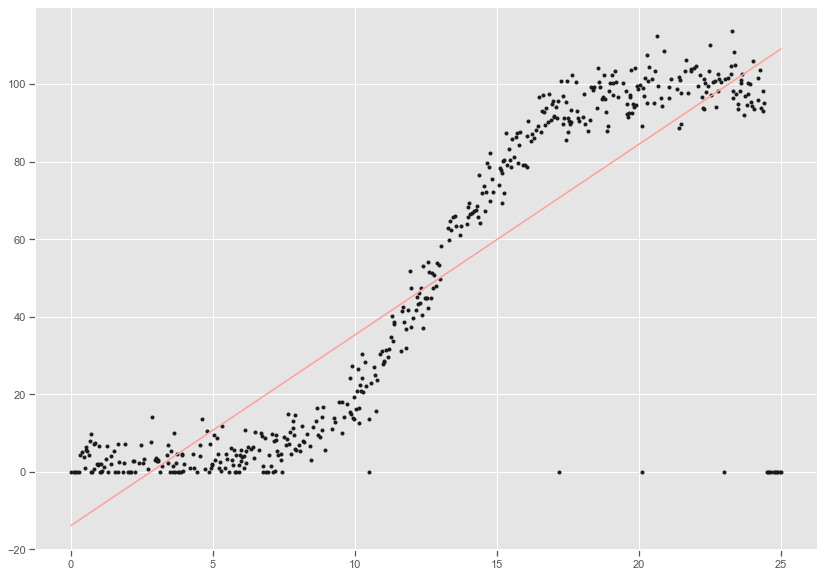

In [53]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

In [54]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

(4.917595665404668, -13.899902630519541)

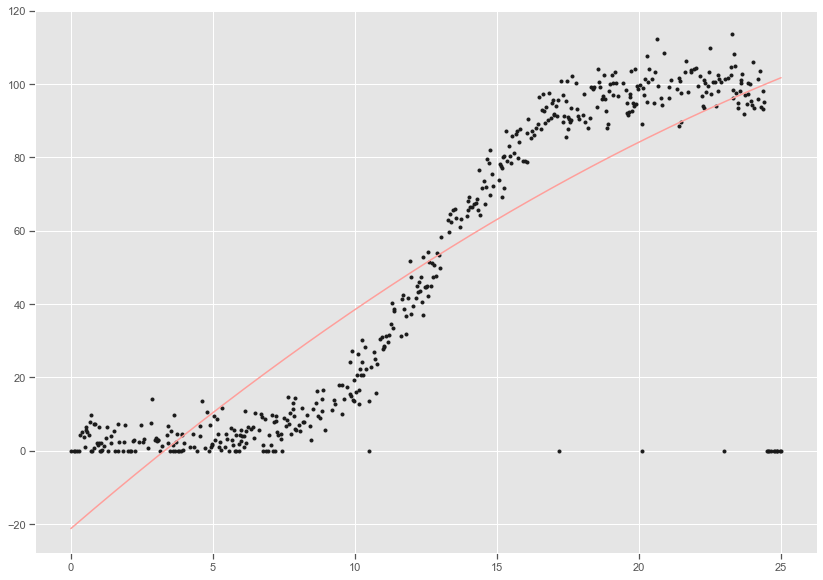

In [55]:
# Create variables with those values.
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x + c, 'r-')

$ax^3+bx^2+cx+d=0$

In [56]:
# Create variables with those values.
a,b,c,d =np.polyfit(x, y, 3)

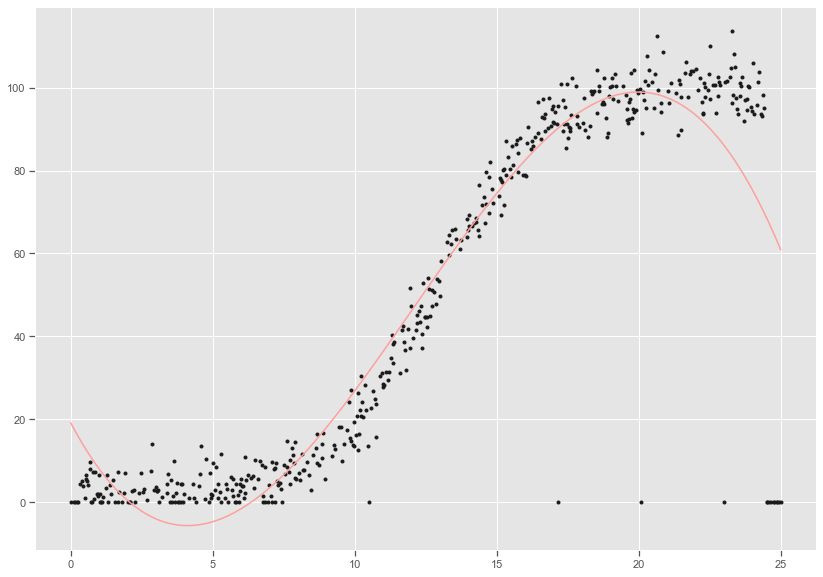

In [57]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x *x + b * x * x+ c*x + d, 'r-')

### A Fourth order polynomial
$ax^4+bx^3+cx^2+dx +e=0$


In [58]:
# Create variables with those values.
a,b,c,d,e =np.polyfit(x, y, 4)

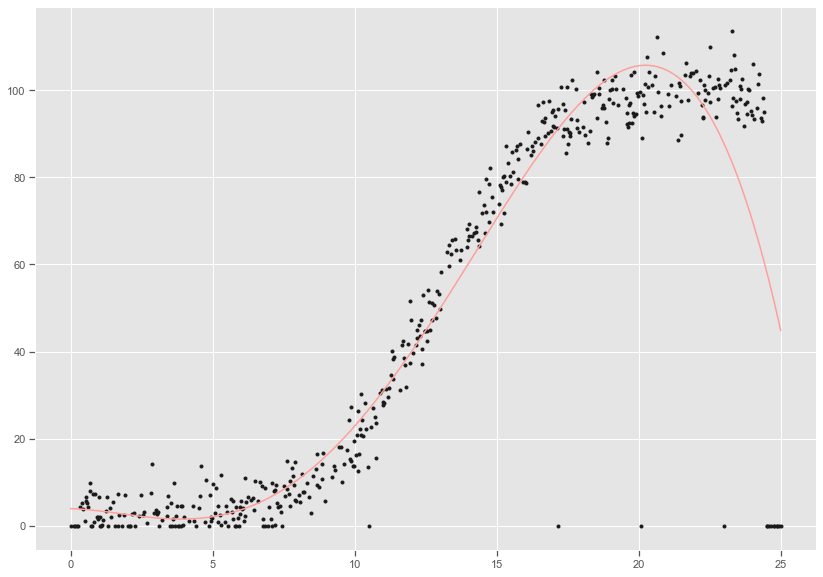

In [59]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x *x* x + b * x * x* x + c * x * x + d* x + e, 'r-')

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
LinearRegression will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member:

In [60]:

# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [61]:
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [62]:
# assign speed to x and power to y, 
x = np.array(df.speed)
y = np.array(df.power)
# for indexing the array
x = x[:, np.newaxis]
x.shape
y = y[:, np.newaxis]
y.shape

(500, 1)

In [63]:
# Create a linear regression model instance.
regr = lm.LinearRegression()

In [64]:
# Train the model using the training sets
regr.fit(x,y)

LinearRegression()

In [68]:
# Here's our intercept.
regr.intercept_

array([-13.89990263])

In [69]:
regr.coef_

array([[4.91759567]])

In [67]:
# See how good our fit is.
#reg.score(x, y)

In [166]:
#plt.plot(x, y, 'x')

In [171]:

reg = linear_model.Ridge(alpha=.5)

In [172]:
reg.fit(x,y)

Ridge(alpha=0.5)

In [173]:
reg.coef_

array([[4.91750127]])

In [174]:
reg.intercept_

array([-13.89871419])

## Machine Learning - Neural Networks

Here I will go through the lecture notes first and apply some of the techniques.

Machine learning is the science of getting computers to act without being explicitly programmed.
- https://www.investopedia.com/terms/n/neuralnetwork.asp#:~:text=A%20neural%20network%20is%20a,organic%20or%20artificial%20in%20nature.
- https://en.wikipedia.org/wiki/Artificial_neural_network

- https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

>Neural nets are a means of doing machine learning, in which a computer learns to perform some task by analyzing training examples.
>Modeled loosely on the human brain, a neural net consists of thousands or even millions of simple processing nodes that are densely interconnected. Most of today’s neural nets are organized into layers of nodes, and they’re “feed-forward,” meaning that data moves through them in only one direction. An individual node might be connected to several nodes in the layer beneath it, from which it receives data, and several nodes in the layer above it, to which it sends data.
>To each of its incoming connections, a node will assign a number known as a “weight.” When the network is active, the node receives a different data item — a different number — over each of its connections and multiplies it by the associated weight. It then adds the resulting products together, yielding a single number. If that number is below a threshold value, the node passes no data to the next layer. If the number exceeds the threshold value, the node “fires,” which in today’s neural nets generally means sending the number — the sum of the weighted inputs — along all its outgoing connections.
When a neural net is being trained, all of its weights and thresholds are initially set to random values. Training data is fed to the bottom layer — the input layer — and it passes through the succeeding layers, getting multiplied and added together in complex ways, until it finally arrives, radically transformed, at the output layer. During training, the weights and thresholds are continually adjusted until training data with the same labels consistently yield similar outputs.
[Mit News](https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414)[nn1]


Here I am referring to the [Introduction to Keras for Engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/) article and noting relevant points.


- First we need to prepare the data before training the model by by turning it into either NumPy arrays or tf.data.Dataset objects). 
The dataset for this project is in csv format. I have already read it into a pandas dataframe but it can be easily converted into a numpy array. 

x = np.array(df.speed)
y = np.array(df.power)

- Do preprocessing such as feature normalisation.
The data consists of two columns of data and thats it. The only preprocesing that is applicable here is to rescale the data to small values as in general the input values to a neural network should be close to zero. According to the tutorial  the data should either be rescaled to have zero-mean and unit-variance or the data in the `[0.1]` range. The preprocessing should ideally be done as part of the model to make it more portable in production. In Keras the preprocessing is done via preprocessing layers which can be included directly into your model either during training or after training. Some preprocessing layers have a state, in this case normalization holds the mean and variance of the features and can be obtained by calling `layer.adapt(data)` on a sample or all of the training data.

## Data loading and preprocessing
>Neural networks don't process raw data, like text files, encoded JPEG image files, or CSV files. They process vectorized & standardized representations.

CSV data needs to be parsed, with numerical features converted to floating point tensors and categorical features indexed and converted to integer tensors. Then each feature typically needs to be normalized to zero-mean and unit-variance.



Build a model that turns your data into useful predictions
Train your model with the built-in Keras fit() method
Evaluate your model on a test data and how to use it for inference on new data
Customize what fit() does,
Speed up training by leveraging multiple GPUs. - I don't think we will need this here!
Refine your model through hyperparameter tuning

In [70]:
x = np.array(df.speed)
y = np.array(df.power)

In [71]:
X =  np.vstack([x, y]).T
X.size 
# 1000
X.shape
# (500, 2)

(500, 2)

In [72]:
mean = np.mean(X)
X -= mean
print(mean)
std = np.std(X, axis=0)
X /= std


30.302491000000003


In [73]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# Example image data, with values in the [0, 255] range
training_data = X

normalizer = Normalization(axis=1)
normalizer.adapt(X)


normalized_data = normalizer(training_data)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))

var: 1.0000
mean: 0.0000


In [74]:
normalized_data

<tf.Tensor: shape=(500, 2), dtype=float32, numpy=
array([[-1.74436283e+00, -1.15494812e+00],
       [-1.72704458e+00, -1.15494812e+00],
       [-1.72358084e+00, -1.15494812e+00],
       [-1.71318960e+00, -1.15494812e+00],
       [-1.70626259e+00, -1.15494812e+00],
       [-1.69933510e+00, -1.05076981e+00],
       [-1.68894386e+00, -1.03020346e+00],
       [-1.68201685e+00, -1.06291699e+00],
       [-1.67495060e+00, -1.12973940e+00],
       [-1.67148733e+00, -1.02137566e+00],
       [-1.66802359e+00, -9.98644471e-01],
       [-1.66455984e+00, -1.02888048e+00],
       [-1.65763235e+00, -1.05343974e+00],
       [-1.65070486e+00, -9.63140607e-01],
       [-1.64724159e+00, -9.20516729e-01],
       [-1.64377785e+00, -1.15494812e+00],
       [-1.64031410e+00, -1.15494812e+00],
       [-1.63338661e+00, -9.80050683e-01],
       [-1.62992287e+00, -1.13582516e+00],
       [-1.62645912e+00, -9.78150368e-01],
       [-1.61606836e+00, -1.10693610e+00],
       [-1.61260462e+00, -1.11624503e+00],
    

In [61]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [5]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

For now I will use the entire dataset for training as I am only trying to figure it out.
The data is already numerical so no encoding is required.
The training set will be the speed and power values from the dataset.

In [75]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [87]:
X[:,1]

array([-7.28899454e-01, -7.28899454e-01, -7.28899454e-01, -7.28899454e-01,
       -7.28899454e-01, -6.24721103e-01, -6.04154839e-01, -6.36868429e-01,
       -7.03690747e-01, -5.95326981e-01, -5.72595847e-01, -6.02831863e-01,
       -6.27391109e-01, -5.37091980e-01, -4.94468097e-01, -7.28899454e-01,
       -7.28899454e-01, -5.54002020e-01, -7.09776436e-01, -5.52101745e-01,
       -6.80887450e-01, -6.90196391e-01, -6.79251771e-01, -5.72283143e-01,
       -7.28899454e-01, -6.78746634e-01, -7.28899454e-01, -7.25988907e-01,
       -6.99842089e-01, -6.47764941e-01, -5.72307197e-01, -7.28899454e-01,
       -6.28930572e-01, -6.80670963e-01, -6.00161857e-01, -7.28899454e-01,
       -5.55204725e-01, -7.28899454e-01, -6.70231479e-01, -7.28899454e-01,
       -6.72155808e-01, -5.59366086e-01, -7.28899454e-01, -7.28899454e-01,
       -7.28899454e-01, -6.63929303e-01, -6.59888212e-01, -7.28899454e-01,
       -6.73887704e-01, -5.61795551e-01, -6.71891213e-01, -6.52768196e-01,
       -7.12855363e-01, -

In [83]:
# Train the neural network on our training data.
#model.fit(df['x'], df['y'], epochs=500)
model.fit(X[:,0],X[:,1], epochs=500)

Epoch 1/500


TypeError: 'NoneType' object is not callable

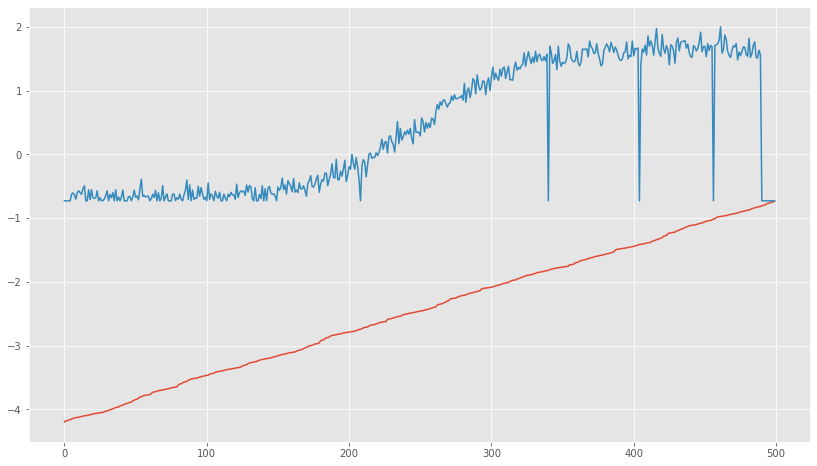

In [77]:
plt.plot(X)

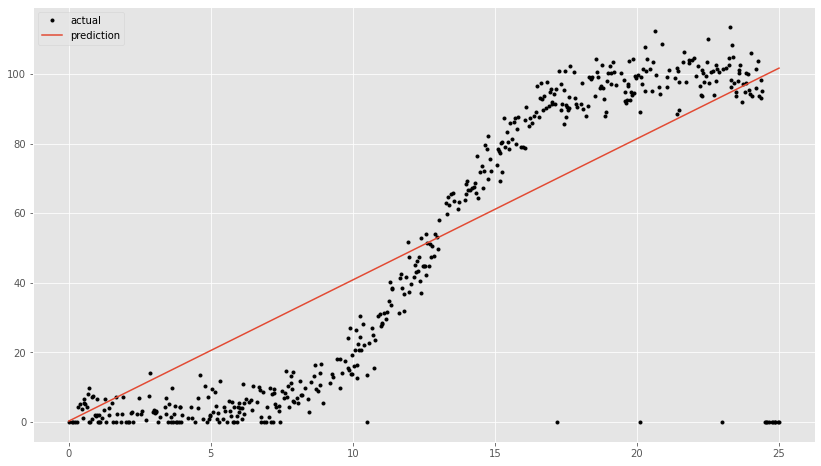

In [13]:
# Plot the predictions (on the training set itself).
plt.plot(df['x'], df['y'], 'k.', label='actual')
plt.plot(df['x'], model.predict(df['x']), label='prediction')
plt.legend();

Train a new model using the sigmoid function as the activation function.
Using the sigmoid function instead of the linear function which is clearly not a good fit.


In [14]:
# Change the activation function.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [16]:
# Without training, let's have a look at the output.


predicted_y = model.predict(df['speed'])

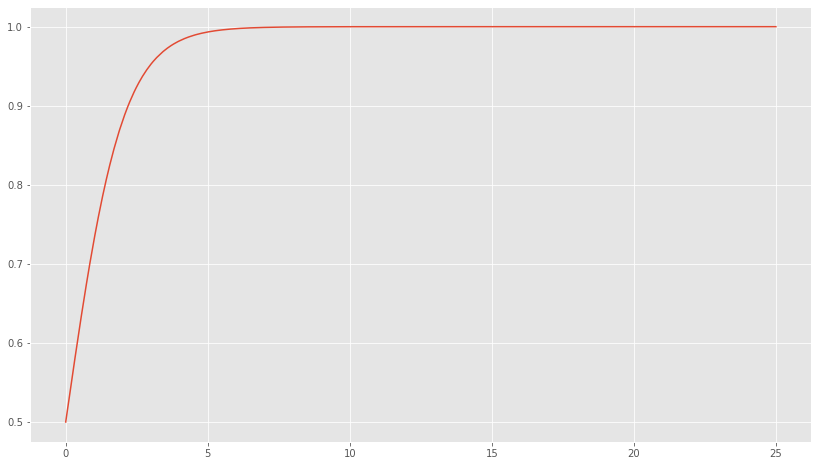

In [17]:
# Let's see what that looks like.
plt.plot(df['x'], predicted_y);

Now training a different model. This one has a hidden layer with 50 neurons. A different kernel initialiser is used. the batch size is how many x's are sent it at any one time. Instead of sending one x in and adjusting the weights and the biases, send it 10 at a time. This sometimes has a smoothing effect. It still sends each x in 500 times (for 500 epochs) but 10 at a time instead of 1 at a time.


In [23]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(60, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [24]:
# Fit the data.
model.fit(df['speed'], df['power'], epochs=500, batch_size=10)

Epoch 1/500
50/50 [==============================] - 0s 1ms/step - loss: 3709.0815
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 3507.9614
Epoch 3/500
50/50 [==============================] - 0s 994us/step - loss: 3260.2468
Epoch 4/500
50/50 [==============================] - 0s 997us/step - loss: 2952.3643
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 2685.0396
Epoch 6/500
50/50 [==============================] - 0s 1ms/step - loss: 2493.1436
Epoch 7/500
50/50 [==============================] - 0s 1ms/step - loss: 2340.7700
Epoch 8/500
50/50 [==============================] - 0s 972us/step - loss: 2211.3821
Epoch 9/500
50/50 [==============================] - 0s 1ms/step - loss: 2095.7632
Epoch 10/500
50/50 [==============================] - 0s 845us/step - loss: 1990.9000
Epoch 11/500
50/50 [==============================] - 0s 831us/step - loss: 1893.3652
Epoch 12/500
50/50 [==============================] - 0s 905us/step - loss:

50/50 [==============================] - 0s 2ms/step - loss: 295.7411
Epoch 194/500
50/50 [==============================] - 0s 2ms/step - loss: 295.8052
Epoch 195/500
50/50 [==============================] - 0s 3ms/step - loss: 295.6832
Epoch 196/500
50/50 [==============================] - 0s 3ms/step - loss: 294.7212
Epoch 197/500
50/50 [==============================] - 0s 2ms/step - loss: 294.1848
Epoch 198/500
50/50 [==============================] - 0s 2ms/step - loss: 294.0611
Epoch 199/500
50/50 [==============================] - 0s 1ms/step - loss: 293.2293
Epoch 200/500
50/50 [==============================] - 0s 1ms/step - loss: 293.0993
Epoch 201/500
50/50 [==============================] - 0s 1ms/step - loss: 292.5007
Epoch 202/500
50/50 [==============================] - 0s 2ms/step - loss: 292.3490
Epoch 203/500
50/50 [==============================] - 0s 2ms/step - loss: 291.8852
Epoch 204/500
50/50 [==============================] - 0s 1ms/step - loss: 291.5317
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 257.6742
Epoch 386/500
50/50 [==============================] - 0s 1ms/step - loss: 257.4122
Epoch 387/500
50/50 [==============================] - 0s 913us/step - loss: 257.5081
Epoch 388/500
50/50 [==============================] - 0s 931us/step - loss: 257.4047
Epoch 389/500
50/50 [==============================] - 0s 939us/step - loss: 257.4244
Epoch 390/500
50/50 [==============================] - 0s 987us/step - loss: 257.6174
Epoch 391/500
50/50 [==============================] - 0s 961us/step - loss: 257.6567
Epoch 392/500
50/50 [==============================] - 0s 983us/step - loss: 257.1400
Epoch 393/500
50/50 [==============================] - 0s 1ms/step - loss: 257.1888
Epoch 394/500
50/50 [==============================] - 0s 1ms/step - loss: 257.2137
Epoch 395/500
50/50 [==============================] - 0s 926us/step - loss: 257.0151
Epoch 396/500
50/50 [==============================] - 0s 937us/step - loss:

Epoch 481/500
50/50 [==============================] - 0s 1ms/step - loss: 254.2479
Epoch 482/500
50/50 [==============================] - 0s 982us/step - loss: 254.0684
Epoch 483/500
50/50 [==============================] - 0s 901us/step - loss: 254.0544
Epoch 484/500
50/50 [==============================] - 0s 799us/step - loss: 254.3590
Epoch 485/500
50/50 [==============================] - 0s 854us/step - loss: 254.7056
Epoch 486/500
50/50 [==============================] - 0s 848us/step - loss: 253.9572
Epoch 487/500
50/50 [==============================] - 0s 850us/step - loss: 253.8017
Epoch 488/500
50/50 [==============================] - 0s 820us/step - loss: 253.7850
Epoch 489/500
50/50 [==============================] - 0s 1ms/step - loss: 253.7307
Epoch 490/500
50/50 [==============================] - 0s 1ms/step - loss: 253.8072
Epoch 491/500
50/50 [==============================] - 0s 1ms/step - loss: 254.3272
Epoch 492/500
50/50 [==============================] - 0s 1ms/

The loss is still very high

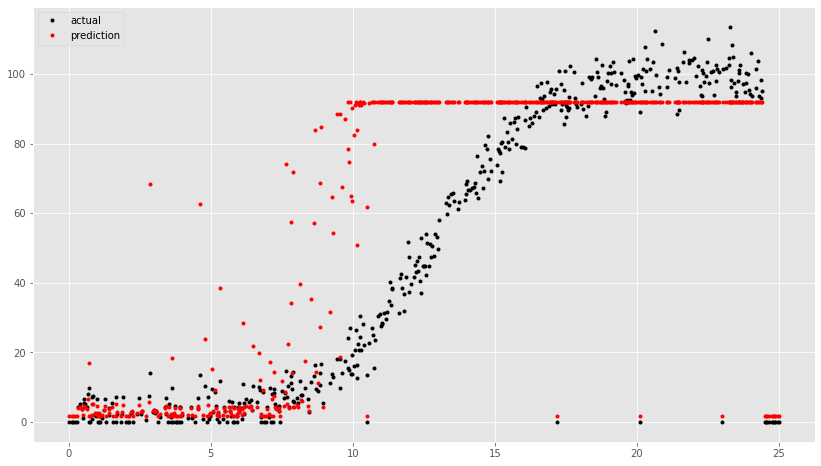

In [26]:
# Now let's see.
plt.plot(df['speed'], df['power'], 'k.',label='actual')
plt.plot(df['speed'], model.predict(df['power']), 'r.',label='prediction')
plt.legend();

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0
Here I am reading through the article referenced, making notes and some paraphrasing. I will reference properly later.

An artificial neuron calculates a weighted sum of its input, adds a bias and then decides whether it should be fired or not. $ Y = \sum{(\text{weight} * \text{input})} + \text{bias}$
The value of Y can be anything from -infinity to + infinity. The neuron does not really know the bounds of the value. So how do we decide whether the neuron should fire or not? This is where the activation functions come in. The activation function will check the Y value produced by the neuron and decide whether outside connections should consider this neuron as activated (fired) or not.

Consider a threshold based activation function. If the value of Y is above a certain value then it could declare it as activated, otherwise not. In this case the output is 1 (activated) when the value is greater than than the threshold and 0 otherwise. This is a step function. There are drawbacks to using this method as an activation function for neural networks though when the response is not a binary yes or no.

A linear activation function A = cx is a straight line function where activation is proportional to input ( which is the weighted sum from neuron ). In this way it will give a range of activations rather than just binary activations. We can connect some neurons and if more than one fire then we could take the max and decide based on that.

The derivative w.r.x is c which means that the gradient has no relationship with X. The descent is going to be on a constant gradient. If there is an error in prediction the changes made by back propagation is constant and not depending on the change in input delta(x).
Another problem concerns the connected layers where each layer is activated by a linear function. 
That activation in turn goes into the next level as input and the second layer calculates weighted sum on that input and it in turn, fires based on another linear activation function.
No matter how many layers we have, if all are linear in nature, the final activation function of last layer is nothing but just a linear function of the input of first layer. Therefore two or more layers can be replaced by a single layer. The whole network then is equivalent to  a single layer with linear activation.

Thw sigmoid function is smooth and looks somewhat like a step function. It is nonlinear in nature and therefore combinations of layers are also non-linear which means that layers can be stacked. It will also give non binary activations unlike the step function. It has a smooth gradient.

Between X values -2 to 2, the Y values are very steep.This means that any small changes in the values of X in that region will cause values of Y to change significantly.This means this function has a tendency to bring the Y values to either end of the curve.
It tends to bring the activations to either side of the curve making clear distinctions on prediction. Another advantage over linear function is that the output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function and therefore the activations are bound in a range. 
Sigmoid functions are one of the most widely used activation functions today. The problems with them is that towards either end of the sigmoid function, the Y values tend to respond very less to changes in X. This means that the gradient at that region is going to be small. It gives rise to a problem of “vanishing gradients”. When the activations reach near the “near-horizontal” part of the curve on either sides, the gradient is small or has vanished ( cannot make significant change because of the extremely small value ). The network refuses to learn further or is drastically slow ( depending on use case and until gradient /computation gets hit by floating point value limits ). There are ways to work around this problem and sigmoid is still very popular in classification problems.
The article also looked at the Tanh activation functions which is a scaled sigmoid function and the ReLu function which gives an output x if x is positive and 0 otherwise. These are both non-linear functions.

The article finishes by suggesting how to choose the correct activation function. 
When you know the function you are trying to approximate has certain characteristics, you can choose an activation function which will approximate the function faster leading to faster training process. For example, a sigmoid works well for a classifier 

https://www.computing.dcu.ie/~humphrys/Notes/Neural/sigmoid.html
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

### End